In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Process Input

In [19]:
census = pd.read_csv('census_income_learn.csv', header=None)
census.columns = ['AGE', 'CLSWKR', 'INDUSTRY', 'OCCUPATION', 'EDU', 'WAGE', 'SCHOOL ATTENDING', 
                  'MARRIAGE', 'INDUSTRY CODE', 'OCCUPATION CODE', 'RACE', 'HISPANIC ORI', 'SEX', 'MEM UNION', 
                  'UNEMPLOY REASON', 'EMPLOYMENT STATUS', 'CAPGAIN', 'CAPLOSS' , 'DIVIDENT',
                  'FEDTAX', 'TAX FILLER', 'PREVIOUS STATE', 'HOUSEHOLD STATUS', 
                  'FAMILY STATUS', 'WEIGHT', 'MIGRANT  (MSA)', 'MIGRANT (REG)', 
                  'MIGRANT (WITHIN REG)', 'LIVE IN HOUSE', 'LIVE IN SUNBELT', 'NUM EMPLOYEES', 
                  'PARENT PRESENTED', 'FATHER COUNTRY', 'MOTHER COUNTRY', 'SELF COUNTRY',
                  'CITIZEN', 'OWN BUSINESS', 'VETERAN QUESIONAIRES', 'VETERAN BENEFIT', 
                  'WORK WEEKs IN YEAR', 'YEAR', 'EARN']

print(census.head(5))
print(census.info())

   AGE                           CLSWKR  INDUSTRY  OCCUPATION  \
0   73                  Not in universe         0           0   
1   58   Self-employed-not incorporated         4          34   
2   18                  Not in universe         0           0   
3    9                  Not in universe         0           0   
4   10                  Not in universe         0           0   

                           EDU  WAGE  SCHOOL ATTENDING        MARRIAGE  \
0         High school graduate     0   Not in universe         Widowed   
1   Some college but no degree     0   Not in universe        Divorced   
2                   10th grade     0       High school   Never married   
3                     Children     0   Not in universe   Never married   
4                     Children     0   Not in universe   Never married   

                  INDUSTRY CODE                       OCCUPATION CODE  \
0   Not in universe or children                       Not in universe   
1                 

In [3]:
# Some general statistics
census.describe()

,AGE,INDUSTRY,OCCUPATION,WAGE,CAPGAIN,CAPLOSS,DIVIDENT,WEIGHT,NUM EMPLOYEES,OWN BUSINESS,VETERAN BENEFIT,WORK WEEKs IN YEAR,YEAR
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


There is no missing values. Some initial visualization of the data

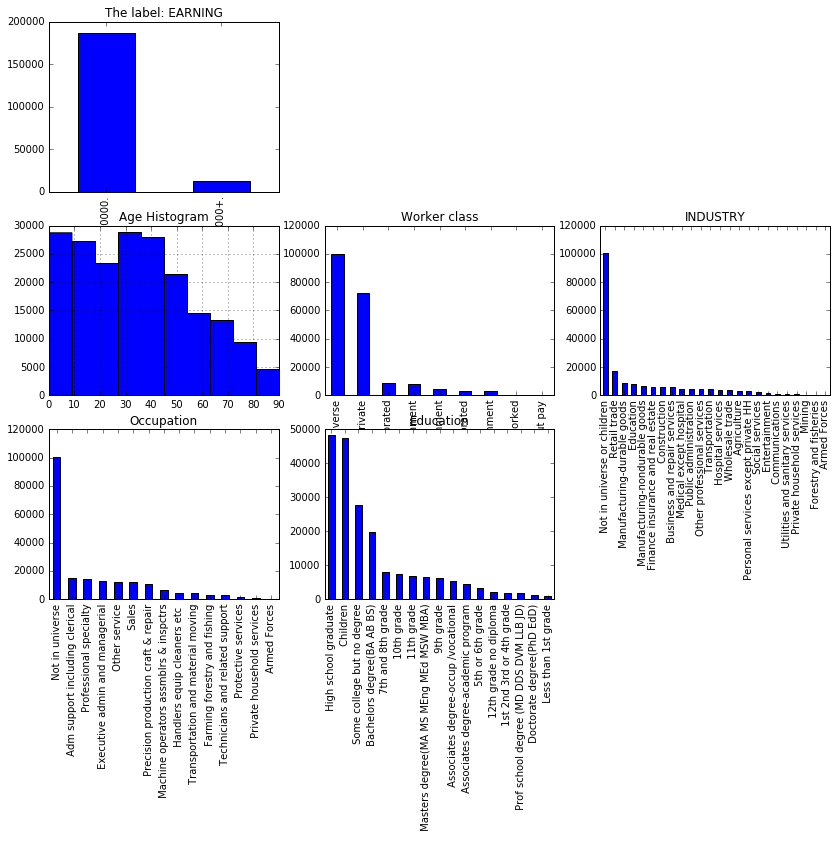

In [4]:
fig = plt.figure(figsize=(14, 14))
fig_dims = (4, 3)

# The label
plt.subplot2grid(fig_dims, (0, 0))
census['EARN'].value_counts().plot(kind='bar', title='The label: EARNING')

plt.subplot2grid(fig_dims, (1, 0))
census['AGE'].hist()
plt.title('Age Histogram')

plt.subplot2grid(fig_dims, (1, 1))
census['CLSWKR'].value_counts().plot(kind='bar', title='Worker class')

plt.subplot2grid(fig_dims, (1, 2))
census['INDUSTRY CODE'].value_counts().plot(kind='bar', title='INDUSTRY')

plt.subplot2grid(fig_dims, (2, 0))
census['OCCUPATION CODE'].value_counts().plot(kind='bar', title='Occupation')

plt.subplot2grid(fig_dims, (2, 1))
census['EDU'].value_counts().plot(kind='bar', title='Education')

## Feature: Age

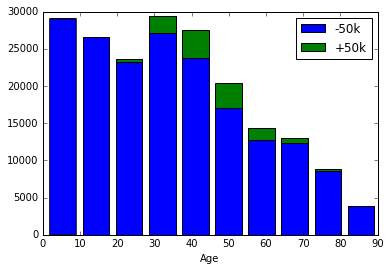

In [5]:
df1 = census[census['EARN'] == ' - 50000.']['AGE']
df2 = census[census['EARN'] == ' 50000+.']['AGE']

max_age = max(census['AGE'])
plt.hist([df1, df2], range=(1, max_age), stacked=True)
plt.legend(('-50k', '+50k'), loc='best')
plt.xlabel('Age')

From the graph, the age has an effect on the total earning, with people in 30 - 50 years old has a higher chance of earning 50k+ than people in different age group.

## Feature: Class Worker

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: CLSWKR, dtype: int64

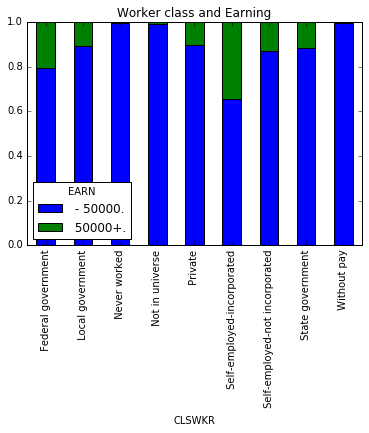

In [6]:
sex_val_xt = pd.crosstab(census['CLSWKR'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Worker class and Earning')

census['CLSWKR'].value_counts()

## Feauture: Industry

This column is the same as 'INDUSTRY CODE' encoded.

In [7]:
census.loc[:, ['INDUSTRY', 'INDUSTRY CODE']].head(15)

,INDUSTRY,INDUSTRY CODE
0,0,Not in universe or children
1,4,Construction
2,0,Not in universe or children
3,0,Not in universe or children
4,0,Not in universe or children
5,40,Entertainment
6,34,Finance insurance and real estate
7,4,Construction
8,43,Education
9,4,Construction


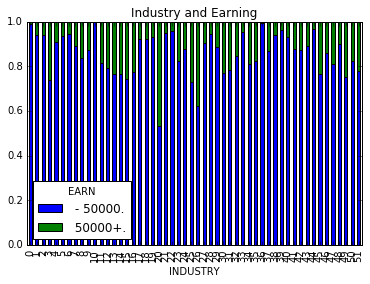

In [8]:
sex_val_xt = pd.crosstab(census['INDUSTRY'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Industry and Earning')

## Feature: Occupation

It also has 'Occupation Code' like the 'Industry Code' above

In [9]:
census.loc[:, ['OCCUPATION', 'OCCUPATION CODE']].head(20)

,OCCUPATION,OCCUPATION CODE
0,0,Not in universe
1,34,Precision production craft & repair
2,0,Not in universe
3,0,Not in universe
4,0,Not in universe
5,10,Professional specialty
6,3,Executive admin and managerial
7,40,Handlers equip cleaners etc
8,26,Adm support including clerical
9,37,Machine operators assmblrs & inspctrs


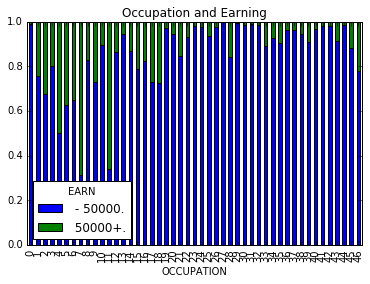

In [10]:
sex_val_xt = pd.crosstab(census['OCCUPATION'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Occupation and Earning')

This is also a good feature. 

## Feature: Gender

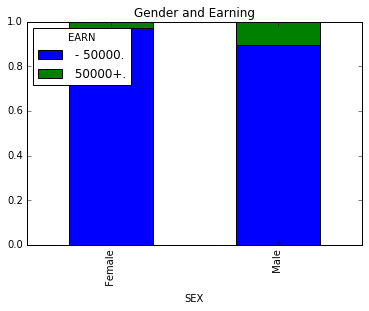

In [11]:
# compare to the earning label
sex_val_xt = pd.crosstab(census['SEX'], census['EARN'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Gender and Earning')

There are 13 columns with numeric values. In these 13 columns, there are no missing values. I will use these first 13 columns for inital model. Will include more features if the accuracy is low. More inspection in row 42th, which is the role of the label. 

Change the 'EARN' row to [1, 0] for classification

In [12]:
# A function to change a non-numeric to numeric values
def changeToNumeric(data, classes):
    for class_ in classes:
        count = 0;
        for i in data[class_].unique():
            data.loc[data[class_] == i, class_] = count
            count += 1

In [20]:
def processInput(data):
    
    data['CAP NET'] = (data['CAPGAIN'] - data['CAPLOSS'])
        
    changeToNumeric(data, ['EARN', 'CLSWKR', 'SEX'])
    
    #drop some useless columns
    data.drop('YEAR', axis=1, inplace=True)

In [21]:
print(census['EARN'].unique())
processInput(census)
print(census['EARN'].unique())

[' - 50000.' ' 50000+.']
[0 1]


In [15]:
# The data is heavily skewed toward not making 50,000. If the model only predict 0, then it has the accuracy of
print(census['EARN'].value_counts())
print(float(187141)/199523)

0    187141
1     12382
Name: EARN, dtype: int64
0.93794199165


# Simple Logistic Regression

In [22]:
#Logistic Regression
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

predictors = ["AGE", "WAGE", "DIVIDENT", "SEX", "NUM EMPLOYEES", "CAP NET", "OWN BUSINESS", 
              "VETERAN BENEFIT", "WORK WEEKs IN YEAR"]

alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds
scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)
# Take the mean of the scores
print(scores.mean())

0.944297152657


# Random Forest 

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)

print(scores.mean())

0.945349654906


# Find Best Features using SelectKBest

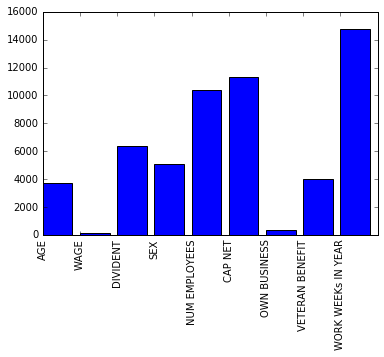

[  3744.14826079    120.11068679   6361.44175427   5082.5266498
  10410.10044403  11312.16726281    327.3568264    4043.02701903
  14743.48690843]


In [24]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

selector = SelectKBest(f_classif, k="all")
selector.fit(census[predictors], census["EARN"])

# Plot the scores. 
plt.bar(range(len(predictors)), selector.scores_)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

print(selector.scores_)

Only the 'Wage' and 'OWN BUSINESS' features are the best features from the graph and we redo the logistic regression and random forest with these 2 features.

In [25]:
predictors = ["AGE", "DIVIDENT", "SEX", "NUM EMPLOYEES", "CAP NET", 
              "VETERAN BENEFIT", "WORK WEEKs IN YEAR"]

alg = LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds
scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)
# Take the mean of the scores
print(scores.mean())

0.944221973355


In [26]:
predictors = ["AGE", "DIVIDENT", "SEX", "NUM EMPLOYEES", "CAP NET", 
              "VETERAN BENEFIT", "WORK WEEKs IN YEAR"]

alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)
scores = cross_validation.cross_val_score(alg, census[predictors], list(census["EARN"]), cv=3)

print(scores.mean())

0.946156584345
